In [105]:
import requests
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import shapely
import geopandas as gpd
from fiona.drvsupport import supported_drivers
from io import StringIO
supported_drivers['KML'] = 'rw'

In [5]:
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}

url = 'https://radio-locator.com/cgi-bin/finder?freq=88.1&country=u&sort=Call&count=100&sr=1&band=FM&is_fx=Y&is_fb=Y&prev=0'
response = requests.get(url,headers=headers)


page_text = response.text

In [23]:
re.findall('info_col"><a href="\/info\/([A-Z0-9]*)-',page_text)

['K201AD',
 'K201AE',
 'K201AG',
 'K201AH',
 'K201AJ',
 'K201AL',
 'K201AM',
 'K201AO',
 'K201AP',
 'K201AQ',
 'K201AV',
 'K201BF',
 'K201BI',
 'K201BK',
 'K201BM',
 'K201BV',
 'K201BW',
 'K201BY',
 'K201CC',
 'K201CF',
 'K201CH',
 'K201CL',
 'K201CO',
 'K201CW',
 'K201DA',
 'K201DH',
 'K201DI',
 'K201DP',
 'K201DV',
 'K201DX',
 'K201DZ',
 'K201EC',
 'K201EG',
 'K201EN',
 'K201ER',
 'K201ES',
 'K201EU',
 'K201EY',
 'K201FD',
 'K201FF',
 'K201FG',
 'K201FJ',
 'K201FK',
 'K201FN',
 'K201FO',
 'K201FP',
 'K201FV',
 'K201FW',
 'K201FX',
 'K201GD',
 'K201HJ',
 'K201HM',
 'K201HO',
 'K201HR',
 'K201HS',
 'K201HV',
 'K201HW',
 'K201HX',
 'K201HZ',
 'K201IB',
 'K201IG',
 'K201IH',
 'K201IJ',
 'K201IL',
 'K201IN',
 'K201IP',
 'K201IS',
 'K201IS',
 'K201IW',
 'K201IY',
 'K201IZ',
 'K201JB',
 'K201JC',
 'K201JD',
 'K201JF',
 'K202BU',
 'K209FS',
 'K213BZ',
 'KAFM',
 'KAKI',
 'KATG',
 'KAWD',
 'KAYB',
 'KAYT',
 'KBAP',
 'KBBG',
 'KBCU',
 'KBPW',
 'KBTL',
 'KCCO',
 'KCCZ',
 'KCEP',
 'KCFD',
 'KCFY'

In [62]:

signs = []
cities = []
formats = []
frequencies = []
freq = 88.1
while freq<108:
    call_length = 1
    previous = 0
    while call_length>0:
        url = 'https://radio-locator.com/cgi-bin/finder?freq='+str(round(freq,1))+'&country=u&sort=Call&count=100&sr=1&band=FM&is_fx=Y&is_fb=Y&prev='+str(previous)
        response = requests.get(url,headers=headers)
        page_text = response.text
        new_signs = re.findall('info_col"><a href="\/info\/([A-Z0-9]*)-',page_text)
        new_cities = re.findall('state=[A-Z]{2}">([^<]*)<',page_text)
        new_formats = re.findall('format_col truncate"><span class="max1">([^<]*)<',page_text)
        call_length = len(new_signs)
        #print(call_length)
        signs.extend(new_signs)
        cities.extend(new_cities)
        formats.extend(new_formats)
        previous+=100
    frequencies.extend([freq]*(len(signs)-len(frequencies)))
    freq += 0.2
    print(freq)

88.3
88.5
88.7
88.9
89.10000000000001
89.30000000000001
89.50000000000001
89.70000000000002
89.90000000000002
90.10000000000002
90.30000000000003
90.50000000000003
90.70000000000003
90.90000000000003
91.10000000000004
91.30000000000004
91.50000000000004
91.70000000000005
91.90000000000005
92.10000000000005
92.30000000000005
92.50000000000006
92.70000000000006
92.90000000000006
93.10000000000007
93.30000000000007
93.50000000000007
93.70000000000007
93.90000000000008
94.10000000000008
94.30000000000008
94.50000000000009
94.70000000000009
94.90000000000009
95.1000000000001
95.3000000000001
95.5000000000001
95.7000000000001
95.9000000000001
96.10000000000011
96.30000000000011
96.50000000000011
96.70000000000012
96.90000000000012
97.10000000000012
97.30000000000013
97.50000000000013
97.70000000000013
97.90000000000013
98.10000000000014
98.30000000000014
98.50000000000014
98.70000000000014
98.90000000000015
99.10000000000015
99.30000000000015
99.50000000000016
99.70000000000016
99.9000000000

In [63]:
all_stations = pd.DataFrame()

all_stations['sign'] = signs
all_stations['freq'] = frequencies
all_stations['city'] = cities
all_stations['format'] = formats
all_stations['state'] = all_stations['city'].str[2]

In [265]:
all_stations.to_csv("all_stations.csv")

In [264]:
all_stations_grouped = all_stations.groupby('sign').first().reset_index()
all_stations_grouped

,sign,freq,city,format,state
0,K201AD,88.1,"China Lake, Etc., CA",Public Radio,CA
1,K201AE,88.1,"Coalville, Etc., UT",Public Radio,UT
2,K201AG,88.1,"Nuiqsut, AK",Public Radio,AK
3,K201AH,88.1,"Kaktovik, AK",Public Radio,AK
4,K201AJ,88.1,"South Lake Tahoe, CA",Classical,CA
...,...,...,...,...,...
21351,WZZT,102.7,"Morrison, IL",Country,IL
21352,WZZU,97.9,"Lynchburg, VA",Rock,VA
21353,WZZV,100.3,"Lagrange, GA",Unknown Format,GA
21354,WZZY,98.3,"Winchester, IN",Adult Contemporary,IN


In [82]:
response = requests.get("https://transition.fcc.gov/fcc-bin/fmq?call=WYYD#tabs-10000-2",headers=headers)


page_text = response.text


In [266]:
all_stations_grouped

,sign,freq,city,format,state
0,K201AD,88.1,"China Lake, Etc., CA",Public Radio,CA
1,K201AE,88.1,"Coalville, Etc., UT",Public Radio,UT
2,K201AG,88.1,"Nuiqsut, AK",Public Radio,AK
3,K201AH,88.1,"Kaktovik, AK",Public Radio,AK
4,K201AJ,88.1,"South Lake Tahoe, CA",Classical,CA
...,...,...,...,...,...
21351,WZZT,102.7,"Morrison, IL",Country,IL
21352,WZZU,97.9,"Lynchburg, VA",Rock,VA
21353,WZZV,100.3,"Lagrange, GA",Unknown Format,GA
21354,WZZY,98.3,"Winchester, IN",Adult Contemporary,IN


In [277]:
polygons = []

for row in range(len(all_stations_grouped)):
    
    call_sign = all_stations_grouped.iloc[row,0]
    freq = round(all_stations_grouped.iloc[row,1],1)

    response = requests.get("https://transition.fcc.gov/fcc-bin/fmq?call="+call_sign+"&freq="+str(freq)+"&fre2="+str(freq)+"#tabs-10000-2",headers=headers)
    page_text = response.text

    appid = re.findall("c_application_id = '(\d*)';",page_text)
    lmsid = re.findall("lms_appid = '([a-z0-9]*)';",page_text)
    call = re.findall("c_callsign = '([^']*)';",page_text)

    city = re.findall('c_comm_city_app = "([^"]*)";',page_text)
    state = re.findall("c_comm_state_app = '([^']*)';",page_text)
    fileno = re.findall("c_filenumber = '([^']*)';",page_text)
    
    shape_list = []
    
    #freq = round(all_stations.loc[all_stations['sign']==call_sign].iloc[0,1],1)

    for i in range(len(appid)):
        comp_url = 'https://transition.fcc.gov/fcc-bin/contourplot.kml?appid='+appid[i]+'&lmsid='+lmsid[i]+'&call='+call[i]+'&freq='+str(round(freq,1))+'&contour=60&city='+city[i]+'&state='+state[i]+'&fileno='+fileno[i]+'&.txt'
        response = requests.get(comp_url,headers=headers)
        try:
            kml_string = response.text
            kml_file = StringIO(kml_string)
            gdf = gpd.read_file(kml_file, driver='KML')
        except:
            pass

        # Plot the data
        #gdf.iloc[3:].plot()
        try:
            shape_list.append(shapely.geometry.Polygon(gdf.iloc[3,2]))
        except:
            pass


    s = gpd.GeoSeries(shape_list)
    combined_shape = s.unary_union
    
    polygons.append(combined_shape)
    
    if row%50==0:
        print(row)
    
all_stations_grouped['geometry'] = polygons

all_stations_grouped.to_csv('allstationspolygons.csv')

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400


ConnectionError: ('Connection aborted.', ConnectionResetError(54, 'Connection reset by peer'))

In [272]:
"https://transition.fcc.gov/fcc-bin/fmq?call="+call_sign+"&freq="+str(freq)+"&fre2="+str(freq)+"#tabs-10000-2"

'https://transition.fcc.gov/fcc-bin/fmq?call=WZZZ&freq=107.5&fre2=107.5#tabs-10000-2'

In [268]:
all_stations_grouped.loc[all_stations_grouped.city=='Los Angeles, CA'].sort_values('freq')

,sign,freq,city,format,state,geometry
10192,KXLU,88.9,"Los Angeles, CA",College,CA,None
8087,KPFK,90.7,"Los Angeles, CA",Public Radio,CA,None
9586,KUSC,91.5,"Los Angeles, CA",Classical,CA,None
8714,KRRL,92.3,"Los Angeles, CA",Hip-Hop,CA,None
1191,K224EY,92.7,"Los Angeles, CA",Christian Contemporary,CA,None
5011,KCBS,93.1,"Los Angeles, CA",Adult Hits,CA,None
7103,KLLI,93.9,"Los Angeles, CA",Spanish Hits,CA,None
9427,KTWV,94.7,"Los Angeles, CA",Urban Contemporary,CA,None
7158,KLOS,95.5,"Los Angeles, CA",Rock,CA,None
10213,KXOL,96.3,"Los Angeles, CA",Spanish Hits,CA,None


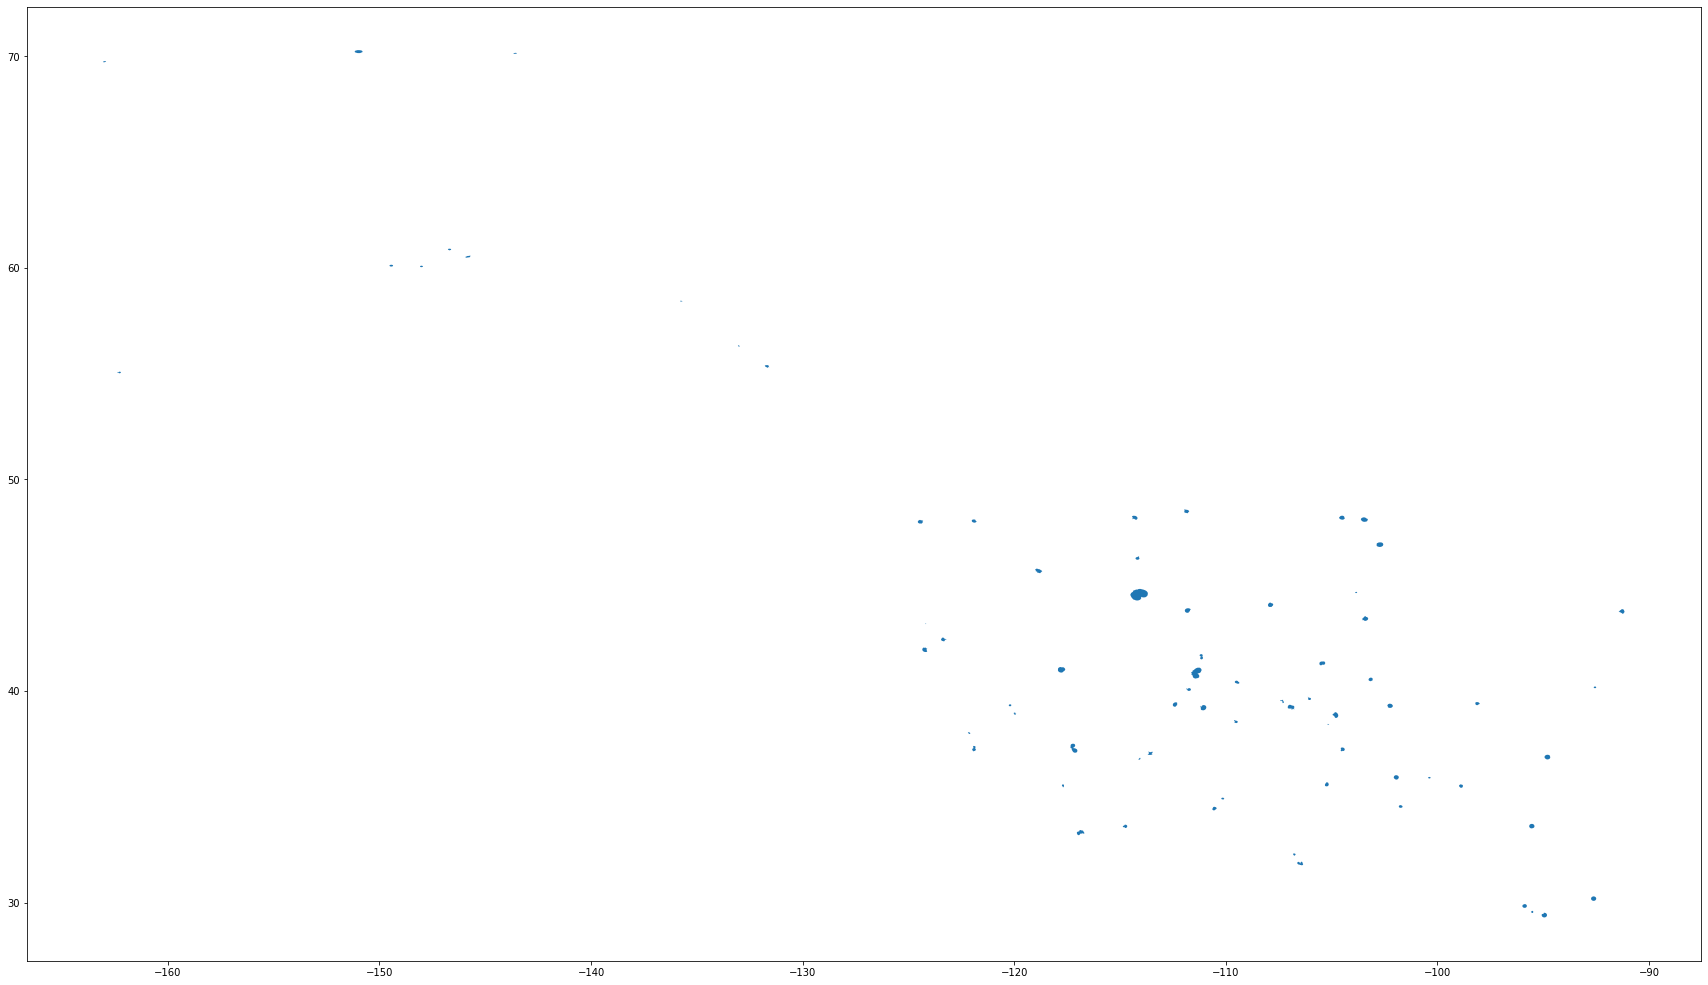

In [274]:
fig, ax = plt.subplots(1, 1, figsize=(30, 30))

gpd.GeoSeries(polygons).plot(ax=ax)


In [251]:
all_stations_grouped

,sign,freq,city,format,geometry
0,K201AD,88.1,"China Lake, Etc., CA",Public Radio,"POLYGON Z ((-117.68394 35.58809 0, -117.68394 ..."
1,K201AE,88.1,"Coalville, Etc., UT",Public Radio,"POLYGON Z ((-111.47963 41.02899 0, -111.47963 ..."
2,K201AG,88.1,"Nuiqsut, AK",Public Radio,"POLYGON Z ((-150.99058 70.28664 0, -150.99058 ..."
3,K201AH,88.1,"Kaktovik, AK",Public Radio,"POLYGON Z ((-143.62167 70.14801 0, -143.62167 ..."
4,K201AJ,88.1,"South Lake Tahoe, CA",Classical,"POLYGON Z ((-119.96321 38.98371 0, -119.96321 ..."
...,...,...,...,...,...
21351,WZZT,102.7,"Morrison, IL",Country,"POLYGON Z ((-89.92484 42.07062 0, -89.92484 42..."
21352,WZZU,97.9,"Lynchburg, VA",Rock,"POLYGON Z ((-79.17938 37.87946 0, -79.1723 37...."
21353,WZZV,100.3,"Lagrange, GA",Unknown Format,"POLYGON Z ((-84.96889 33.11289 0, -84.96889 33..."
21354,WZZY,98.3,"Winchester, IN",Adult Contemporary,"POLYGON Z ((-84.93689 40.31821 0, -84.93689 40..."


In [260]:


all_stations.groupby("sign").count().sort_values("freq")

,freq,city,format,state
sign,,,,
K201AD,1,1,1,1
W288DO,1,1,1,1
W288DN,1,1,1,1
W288DL,1,1,1,1
W288DK,1,1,1,1
...,...,...,...,...
KOIT,7,7,7,7
KNIV,7,7,7,7
KMVQ,7,7,7,7


In [262]:
all_stations.loc[all_stations['sign']=="KNX"]

,sign,freq,city,format,state
10739,KNX,97.1,"Los Angeles, CA",News,CA


In [255]:
all_stations_grouped.loc[all_stations_grouped.city=='Los Angeles, CA']

,sign,freq,city,format,geometry
1191,K224EY,92.7,"Los Angeles, CA",Christian Contemporary,"POLYGON Z ((-118.25702 34.16521 0, -118.25702 ..."
2356,K252FO,98.3,"Los Angeles, CA",Classic Country,"POLYGON Z ((-118.47223 34.30464 0, -118.47223 ..."
2844,K264CQ,100.7,"Los Angeles, CA",Spanish Sports,"POLYGON Z ((-118.3458 34.06385 0, -118.3458 34..."
2992,K268DD,101.5,"Los Angeles, CA",Spanish Christian,"POLYGON Z ((-118.36619 34.05242 0, -118.36619 ..."
4017,K292HC,106.3,"Los Angeles, CA",Asian,None
4780,KBIG,104.3,"Los Angeles, CA",Hot AC,"POLYGON Z ((-118.01625 35.02405 0, -117.99828 ..."
5011,KCBS,93.1,"Los Angeles, CA",Adult Hits,"POLYGON Z ((-118.00491 35.02414 0, -117.98679 ..."
5738,KFEP,99.1,"Los Angeles, CA",Public Radio,"POLYGON Z ((-118.37063 34.17298 0, -118.37063 ..."
5831,KFQM,101.5,"Los Angeles, CA",Spanish Christian,"POLYGON Z ((-118.55445 34.08844 0, -118.55445 ..."
5890,KGAP,96.7,"Los Angeles, CA",Variety,"POLYGON Z ((-118.32883 34.24789 0, -118.32883 ..."


In [275]:
polygons

[<POLYGON Z ((-117.684 35.588 0, -117.684 35.588 0, -117.686 35.588 0, -117.6...>,
 <POLYGON Z ((-111.48 41.029 0, -111.48 41.029 0, -111.484 41.024 0, -111.487...>,
 <POLYGON Z ((-150.991 70.287 0, -150.991 70.287 0, -150.994 70.287 0, -150.9...>,
 <POLYGON Z ((-143.622 70.148 0, -143.622 70.148 0, -143.623 70.148 0, -143.6...>,
 <POLYGON Z ((-119.963 38.984 0, -119.963 38.984 0, -119.965 38.984 0, -119.9...>,
 <POLYGON Z ((-133.029 56.336 0, -133.029 56.336 0, -133.03 56.336 0, -133.03...>,
 <POLYGON Z ((-135.71 58.432 0, -135.71 58.432 0, -135.711 58.432 0, -135.711...>,
 <POLYGON Z ((-149.439 60.145 0, -149.439 60.145 0, -149.44 60.145 0, -149.44...>,
 <POLYGON Z ((-103.847 44.684 0, -103.847 44.684 0, -103.848 44.684 0, -103.8...>,
 <POLYGON Z ((-103.458 43.514 0, -103.458 43.514 0, -103.46 43.513 0, -103.46...>,
 <POLYGON Z ((-163.017 69.762 0, -163.017 69.762 0, -163.018 69.761 0, -163.0...>,
 <POLYGON Z ((-117.259 37.507 0, -117.259 37.507 0, -117.264 37.505 0, -117.2...>,
 <PO